In [11]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2
from matplotlib.colors import LogNorm


1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

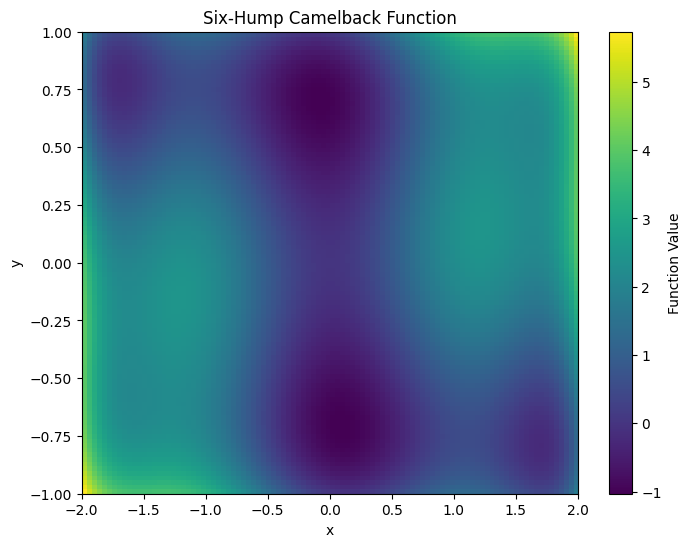

Global Minima:
Number of Minima: 1
Minimum Function Values: 0.0
Corresponding (x, y) values: [0. 0.]


In [2]:
# Define the six-hump camelback function
def six_hump_camelback(x):
    return (4 - 2.1 * x[0]**2 + x[0]**4 / 3) * x[0]**2 + x[0] * x[1] + (-4 + 4 * x[1]**2) * x[1]**2

# Define the variable bounds
bounds = [(-2, 2), (-1, 1)]

# Generate a meshgrid for visualization
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = six_hump_camelback([X, Y])

# Display the function landscape
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[-2, 2, -1, 1], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Function Value')
plt.title('Six-Hump Camelback Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Find the global minima using scipy.optimize.minimize
initial_guess = [0, 0]
result = minimize(six_hump_camelback, initial_guess, bounds=bounds)

# Display the results
print("Global Minima:")
print(f"Number of Minima: {result.fun.size}")
print(f"Minimum Function Values: {result.fun}")
print(f"Corresponding (x, y) values: {result.x}")


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

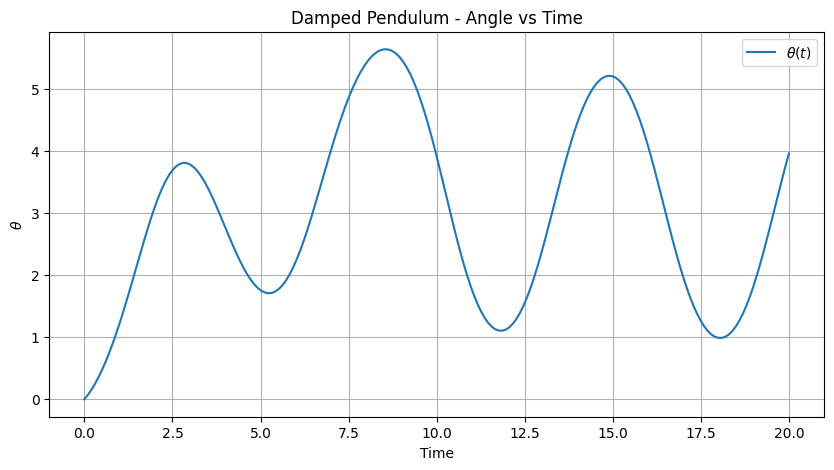

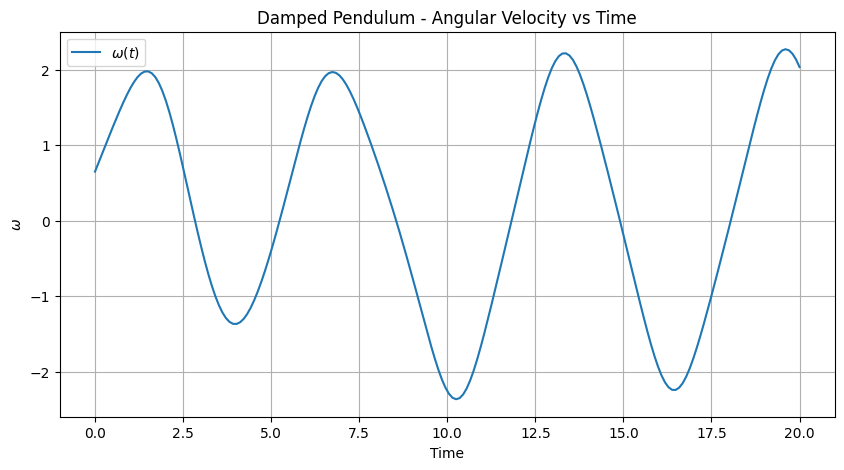

In [5]:

# Function that returns the derivatives of theta and omega
def damped_pendulum(y, t, Q, g, l, d, Omega):
    theta, omega = y
    dydt = [omega, -omega / Q + (g / l) * np.sin(theta) + d * np.cos(Omega * t)]
    return dydt

# Set the parameters
l = 10.0
Q = 2.0
g = 9.8
d = 1.5
Omega = 1.0  # Adjust the driving frequency as needed
theta0 = 0.0
omega0 = 0.65

# Initial conditions
y0 = [theta0, omega0]

# Time grid
t = np.linspace(0, 20, 200)

# Solve the ODE
sol = odeint(damped_pendulum, y0, t, args=(Q, g, l, d, Omega))

# Extract results
theta, omega = sol.T

# Plot theta as a function of time
plt.figure(figsize=(10, 5))
plt.plot(t, theta, label=r'$\theta(t)$')
plt.title('Damped Pendulum - Angle vs Time')
plt.xlabel('Time')
plt.ylabel(r'$\theta$')
plt.legend()
plt.grid(True)
plt.show()

# Plot omega as a function of time
plt.figure(figsize=(10, 5))
plt.plot(t, omega, label=r'$\omega(t)$')
plt.title('Damped Pendulum - Angular Velocity vs Time')
plt.xlabel('Time')
plt.ylabel(r'$\omega$')
plt.legend()
plt.grid(True)
plt.show()


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

C:\Users\ecapo\AppData\Local\Temp\ipykernel_52740\1822820598.py:18: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / np.abs(freqs[dominant_freqs])


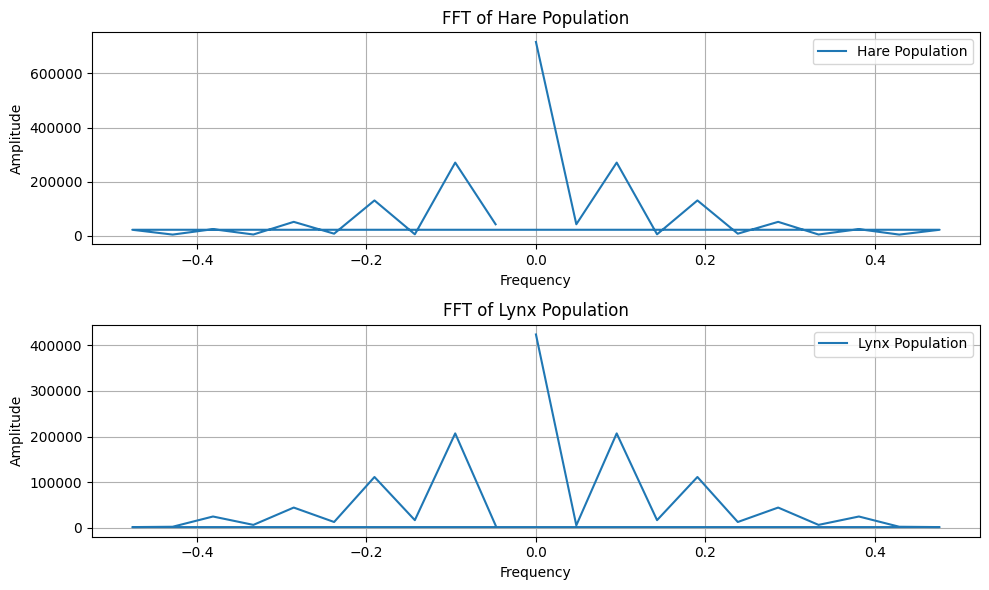

Dominant periods (in years): Hare=inf, Lynx=inf


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "data/populations.txt"
data = np.loadtxt(file_path)

# Extract time and population data
time = data[:, 0]
populations = data[:, 1:]

# Perform FFT on each population column
fft_results = np.fft.fft(populations, axis=0)
freqs = np.fft.fftfreq(len(time), time[1] - time[0])

# Trova la frequenza dominante (periodicità)
dominant_freqs = np.argmax(np.abs(fft_results), axis=0)
periods = 1 / np.abs(freqs[dominant_freqs])

# Plot dei risultati
plt.figure(figsize=(10, 6))

for i, animal in enumerate(['Hare', 'Lynx']):
    plt.subplot(2, 1, i + 1)
    plt.plot(freqs, np.abs(fft_results[:, i]), label=f'{animal} Population')
    plt.title(f'FFT of {animal} Population')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

# Print dei periodi dominanti
print(f"Dominant periods (in years): Hare={periods[0]:.2f}, Lynx={periods[1]:.2f}")


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

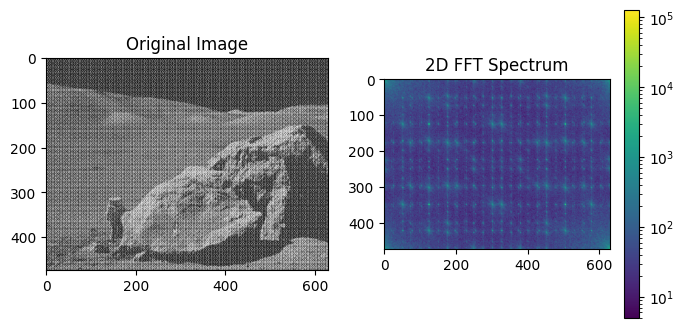

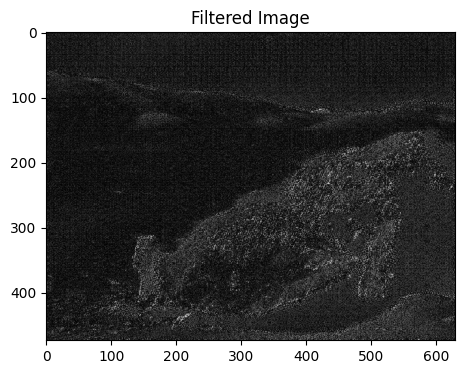

In [21]:
# Import the image
image = plt.imread("images/moonlanding.png")

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Perform 2D FFT
image_fft = fft2(image)

# Plot the spectrum
plt.subplot(1, 2, 2)
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.title('2D FFT Spectrum')
plt.colorbar()

# Find and remove the periodic noise
# Set a threshold to remove noise components
threshold = 500
image_fft[np.abs(image_fft) > threshold] = 0

# Apply the inverse Fourier transform
image_filtered = np.abs(ifft2(image_fft))

# Normalize the filtered image
image_filtered = (image_filtered - np.min(image_filtered)) / (np.max(image_filtered) - np.min(image_filtered))

# Display the filtered image
plt.figure(figsize=(8, 4))
plt.imshow(image_filtered, cmap='gray')
plt.title('Filtered Image')

plt.show()
